# Classifier Models

Now that the text data has been prepared and preprocessed, I would now build a classifier algorithm/model to classify the predictions of different genders(Male, female and brand). Since there are 3 labels of classes, this is a multiclass classification. I use the Tweets_cleaned(cleaned_version) of the file to predict the gender from the text.

Usually, Classification is the process of predicting the class of given data points. Classes are sometimes called as targets/ labels or categories. Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y). 

Now let me load the data and prepare it to train and feed it to the model. Let's start.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Importing the required csv files saved previously from our feature and target files

X = pd.read_csv('../Springboard-Capstone-2/tweets_cleaned.csv')
y = pd.read_csv('../Springboard-Capstone-2/target.csv')

In [3]:
# split the dataset in train and test

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45, stratify=y)

In [4]:
print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))

(9662, 1000)
(4142, 1000)
9662
4142


## 1. Logistic Regression Classifier

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
logistic = LogisticRegression(penalty = 'l1', C= 0.1, random_state = 45)
pipeline = Pipeline(steps=[('sc', sc),
                       ('logistic', logistic)])

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logistic',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l1', random_state=45,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [6]:
y_pred = pipeline.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred))
print('Classification report:\n',classification_report(y_test,y_pred))

Accuracy: 0.6103331723804926
Confusion matrix:
 [[ 761  214  161]
 [ 115 1116  379]
 [ 157  588  651]]
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.67      0.70      1136
           1       0.58      0.69      0.63      1610
           2       0.55      0.47      0.50      1396

    accuracy                           0.61      4142
   macro avg       0.62      0.61      0.61      4142
weighted avg       0.61      0.61      0.61      4142



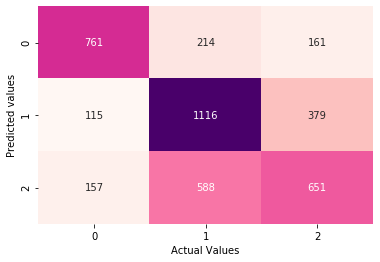

In [7]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,y_pred)

sns.heatmap(conf_mat,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.show()

## 2. RandomForest Classifier

In [8]:
# split the dataset in train and test

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45, stratify=y)

In [9]:
#Using RFR with the best parameters obtained from GridSearchCV

from sklearn.ensemble import RandomForestClassifier

rfc1=RandomForestClassifier(n_estimators= 50, max_depth=15, bootstrap=True, random_state=45)

# Training the RFR model
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=45, verbose=0,
                       warm_start=False)

In [10]:
y_pred = rfc1.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred))
print('Classification report:\n',classification_report(y_test,y_pred))

Accuracy: 0.5485272815065186
Confusion matrix:
 [[ 551  551   34]
 [  37 1492   81]
 [  75 1092  229]]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.49      0.61      1136
           1       0.48      0.93      0.63      1610
           2       0.67      0.16      0.26      1396

    accuracy                           0.55      4142
   macro avg       0.66      0.53      0.50      4142
weighted avg       0.64      0.55      0.50      4142



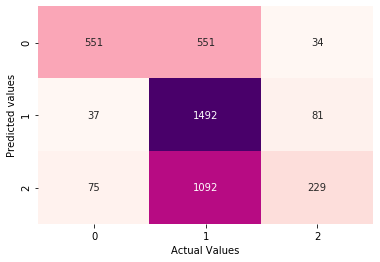

In [11]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,y_pred)

sns.heatmap(conf_mat,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.show()

## 3. SVM

In [12]:
# split the dataset in train and test

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45, stratify=y)

In [13]:
%%time

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
svm = SVC(C=1,gamma='scale', kernel='linear')
pipe = Pipeline(steps=[('sc', sc),
                       ('SVM', svm)])

# train the model with the Pipeline object

pipe.fit(X_train, y_train)

Wall time: 46min 24s


Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('SVM',
                 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='linear', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [14]:
y_pred = pipe.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred))
print('Classification report:\n',classification_report(y_test,y_pred))

Accuracy: 0.5907774022211492
Confusion matrix:
 [[ 791  178  167]
 [ 183 1051  376]
 [ 230  561  605]]
Classification report:
               precision    recall  f1-score   support

           0       0.66      0.70      0.68      1136
           1       0.59      0.65      0.62      1610
           2       0.53      0.43      0.48      1396

    accuracy                           0.59      4142
   macro avg       0.59      0.59      0.59      4142
weighted avg       0.59      0.59      0.59      4142



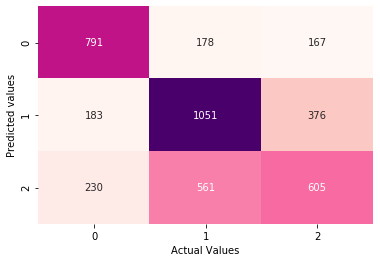

In [15]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,y_pred)

sns.heatmap(conf_mat,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.show()


Different ML algorithms accuracies comparision
LR: 0.560856 (0.010851)
RFC: 0.539329 (0.008562)
SVM: 0.598219 (0.011240)


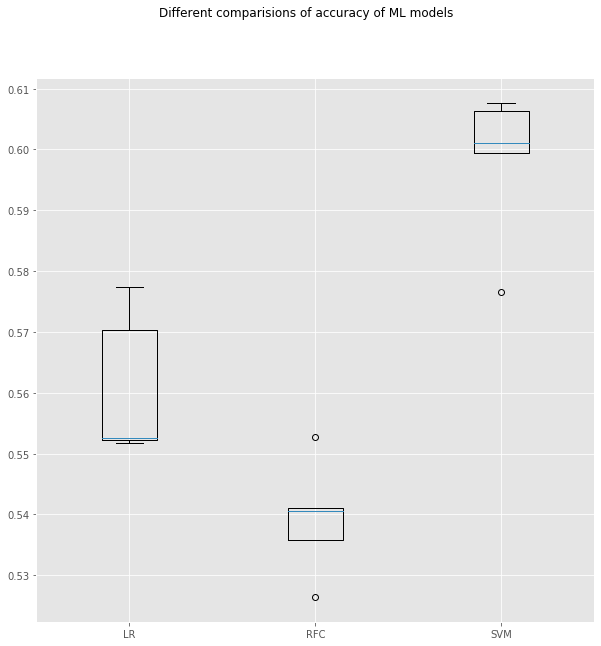

Wall time: 15min 12s


In [16]:
%%time
# obtained the below code from https://www.dezyre.com/recipes/compare-sklearn-classification-algorithms-in-python. Customized it to my dataset

def Snippet_183():
    print()
    print(format('Different ML algorithms accuracies comparision'))
    import warnings
    warnings.filterwarnings("ignore")
    # load libraries
    import matplotlib.pyplot as plt
    from sklearn import model_selection
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt

    plt.style.use('ggplot')
    seed = 45
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    # prepare models
    models = []
    models.append(('LR', LogisticRegression(penalty = 'l1', C= 0.1, random_state = seed)))
    models.append(('RFC', RandomForestClassifier(n_estimators= 50, max_depth=15, bootstrap=True, random_state=seed)))
    models.append(('SVM', SVC(C=1,gamma='scale', kernel='linear', random_state=seed)))
    # evaluate each model
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
	     kfold = model_selection.KFold(n_splits=5, random_state=seed)
	     cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	     results.append(cv_results)
	     names.append(name)
	     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	     print(msg)
    # boxplot algorithm comparison
    fig = plt.figure(figsize=(10,10))
    fig.suptitle('Different comparisions of accuracy of ML models')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
Snippet_183()